In [2]:
from log_analysis import *

baseline = {'mAP': .383, 'AP@75': .441, 'AP@50': .594, 'LAMR': .45776}
sweeps = {}

sizes = [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 'all']
sweeps['fine-tuning'] = df_from_sweep('sweeps/fine-tune', sizes)

sizes = [1, 2, 5, 10, 20, 50, 'all']
sweeps['GPA all'] = df_from_sweep('sweeps/gpa_ppp', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps['GPA'] = df_from_sweep('sweeps/gpa_p-p', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100, 'all']
sweeps['SPA all'] = df_from_sweep('sweeps/gpa_pxg', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100, 'all']
sweeps['SPA'] = df_from_sweep('sweeps/gpa_-xg', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps['ADV'] = df_from_sweep('sweeps/adv_0', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps['ADV pretrained'] = df_from_sweep('sweeps/adv_0_p', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps['ADV necks 0+4'] = df_from_sweep('sweeps/adv_04', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps['ADV necks 0+1+4'] = df_from_sweep('sweeps/adv_014', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps['SSADA'] = df_from_sweep('sweeps/adv_g0', sizes)

# sizes = [1, 2, 5]
# sweeps['SSADA 19²'] = df_from_sweep('sweeps/adv_g0_', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps['ADV + SPA'] = df_from_sweep('sweeps/adv_0_gpa_-xg', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps['GPA unsupervised'] = df_from_sweep('sweeps/gpa_p-p_u', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps['ADV unsupervised'] = df_from_sweep('sweeps/adv_0_u', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps['fine-tuning MW'] = df_from_sweep('sweeps/fine-tune_mw', sizes, alt_pattern=True)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps['ADV + SPA MW'] = df_from_sweep('sweeps/adv_0_gpa_-xg_mw', sizes, alt_pattern=True)

df = pd.concat(sweeps.values(), keys=sweeps.keys()).rename_axis(['setting', None]).reset_index(level=0)
df.replace(['bbox_mAP', 'bbox_mAP_75', 'bbox_mAP_50'], ['mAP', 'AP@75', 'AP@50'], inplace=True)

# Mirror Worlds
baseline_mw = {'mAP': .4, 'AP@75': .43, 'AP@50': .655, 'LAMR': .4484}
sweeps_mw = {}

sizes = [1, 2, 5, 10, 20, 50, 100, 200, 'all']
sweeps_mw['fine-tuning'] = df_from_sweep('sweeps_mw/fine-tune', sizes, all_size=819)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps_mw['ADV + SPA'] = df_from_sweep('sweeps_mw/adv_0_gpa_-xg', sizes)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps_mw['fine-tuning PIROPO'] = df_from_sweep('sweeps_mw/fine-tune_piropo', sizes, alt_pattern=True)

sizes = [1, 2, 5, 10, 20, 50, 100]
sweeps_mw['ADV + SPA PIROPO'] = df_from_sweep('sweeps_mw/adv_0_gpa_-xg_piropo', sizes, alt_pattern=True)

df_mw = pd.concat(sweeps_mw.values(), keys=sweeps_mw.keys()).rename_axis(['setting', None]).reset_index(level=0)
df_mw.replace(['bbox_mAP', 'bbox_mAP_75', 'bbox_mAP_50'], ['mAP', 'AP@75', 'AP@50'], inplace=True)

sweeps/adv_0_gpa_-xg/1c.log does not exist, skipping it ...
no values in log sweeps_mw/adv_0_gpa_-xg_piropo/1c.log
no values in log sweeps_mw/adv_0_gpa_-xg_piropo/1c.log
no values in log sweeps_mw/adv_0_gpa_-xg_piropo/1c.log
no values in log sweeps_mw/adv_0_gpa_-xg_piropo/1c.log


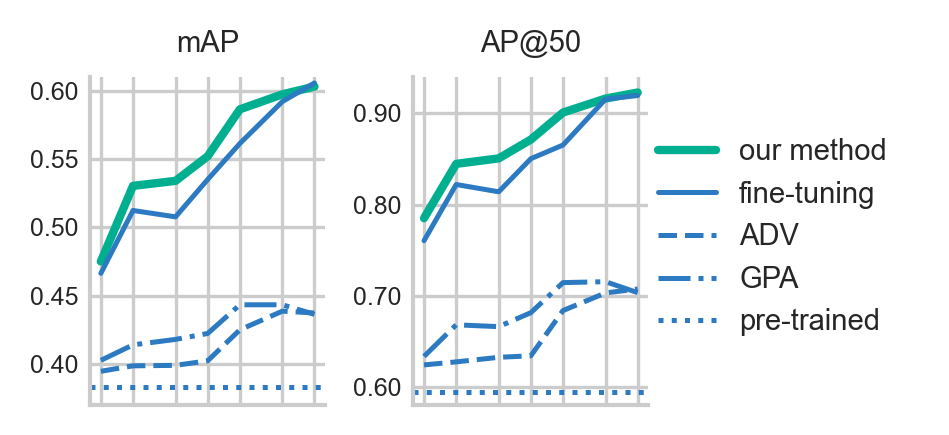

In [30]:
from matplotlib import rcParams

sb.set_context('paper')
sb.set_style('whitegrid')
sb.set_palette(kit4cyan())
fontsize = 7
rcParams['xtick.major.pad']=-2
rcParams['ytick.major.pad']=-2

# facet grid with individual x-axis
hue_order = ['ADV + SPA', 'fine-tuning', 'ADV unsupervised', 'GPA unsupervised']
g = sb.relplot(data=df[(df['setting'].isin(['ADV + SPA', 'fine-tuning', 'ADV unsupervised', 'GPA unsupervised']))
                       & (df['metric'].isin(['mAP', 'AP@50'])) & (df['size'] <= 100)],
               x='size',
               y='value',
               col='metric',
               hue='setting',
               hue_order=hue_order,
               kind='line',
               err_style=None,
               facet_kws={
                   'sharey': False,
                   'sharex': True,
                   'legend_out': False
               },
               height=5,
               aspect=1)
# set figure size to textwidth in latex and make space for legend
g.fig.set_size_inches(3.123, 1.25)
g.fig.set_dpi(300)
axes = g.axes.flatten()
# adjust linstyle
titles = ['mAP', 'AP@50']
for a, t in enumerate(titles):
    axes[a].set_title(t, fontsize=fontsize)
    axes[a].legend([], [], frameon=False)  # remove old legend
    # recolor and restyle lines
    axes[a].lines[0].set_linewidth(2)
    axes[a].lines[2].set_c('#2B7AC2') # blue
    axes[a].lines[2].set_linestyle('--')
    axes[a].lines[3].set_c('#2B7AC2') # blue
    axes[a].lines[3].set_linestyle('-.')
# baseline reference line
for a, i in zip([0, 1], [0, 2]):
    axes[a].axhline(list(baseline.values())[i], ls=':', c='#2B7AC2')
# legend
l = ['our method', 'fine-tuning', 'ADV', 'GPA', 'pre-trained']
# _h = [plt.plot([],marker='', ls='')[0]] # empty handle for legend heading
h = axes[0].lines[:1] + axes[0].lines[1:4] + axes[0].lines[8:9]
leg = g.fig.legend(h, l, frameon=False, loc=(.68, .2), fontsize=fontsize)
# set legend columnd headers bold
# for vpack in leg._legend_handle_box.get_children():
#     for hpack in vpack.get_children()[1:2]:
#         hpack.get_children()[0].set_width(0) # modify spacing before text
#         hpack.get_children()[1].get_children()[0].set_fontweight('bold')
# labels
# g.set_xlabels('training images', fontsize=fontsize)
g.set_xlabels('', fontsize=fontsize)
g.set_ylabels('')
plt.xscale('log')
sizes = [1, 2, 5, 10, 20, 50, 100]
# g.set(xticks=sizes, xticklabels=sizes)
g.set(xticks=sizes, xticklabels=[])
g.set_xticklabels(rotation=90, size=fontsize-1)
g.axes[0][0].set_ylim(ymin=.37, ymax=.61)
yticks = [[.4, .45, .5, .55, .6], [.6, .7, .8, .9]]
g.axes[0][0].set_yticks(yticks[0])
g.axes[0][0].set_yticklabels([f'{yt:0.2f}' for yt in yticks[0]], fontdict={'fontsize': fontsize-1})
g.axes[0][1].set_ylim(ymin=.58, ymax=.94)
g.axes[0][1].set_yticks(yticks[1])
g.axes[0][1].set_yticklabels([f'{yt:0.2f}' for yt in yticks[1]], fontdict={'fontsize': fontsize-1})
plt.tight_layout(pad=0, w_pad=0.7, rect=[0, 0, 0.66, 1])

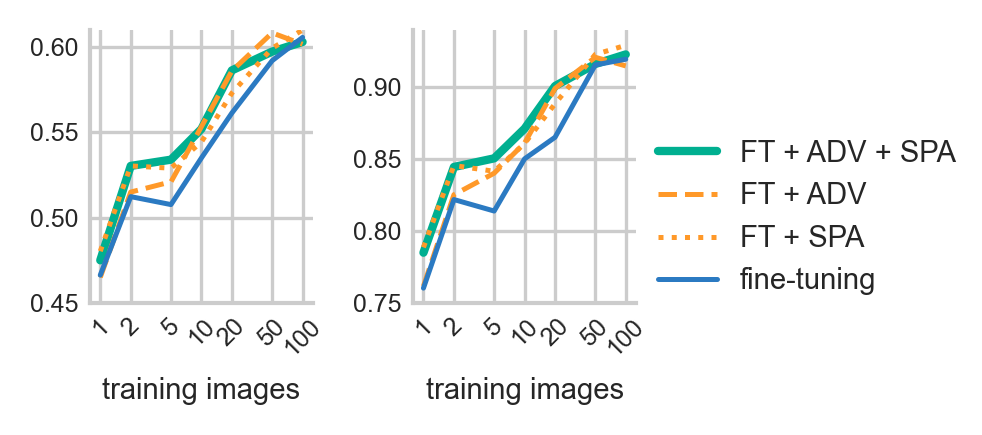

In [41]:
from matplotlib import rcParams

sb.set_context('paper')
sb.set_style('whitegrid')
sb.set_palette(kit4cyan())
fontsize = 7
rcParams['xtick.major.pad'] = -2
rcParams['ytick.major.pad'] = -2

# facet grid with individual x-axis
hue_order = ['ADV + SPA', 'ADV', 'SPA', 'fine-tuning']
g = sb.relplot(data=df[(df['setting'].isin(['ADV + SPA', 'fine-tuning', 'ADV', 'SPA']))
                       & (df['metric'].isin(['mAP', 'AP@50'])) & (df['size'] <= 100)],# & (df['size'] > 1)],
               x='size',
               y='value',
               col='metric',
               hue='setting',
               hue_order=hue_order,
               kind='line',
               err_style=None,
               facet_kws={
                   'sharey': False,
                   'sharex': True,
                   'legend_out': False
               },
               height=5,
               aspect=1)
# set figure size to textwidth in latex and make space for legend
g.fig.set_size_inches(3.123, 1.25)
g.fig.set_dpi(300)
g.fig.subplots_adjust(left=None, right=.65, bottom=None, top=None, wspace=.5)
axes = g.axes.flatten()
# adjust linstyle
titles = ['mAP', 'AP@50']
for a, t in enumerate(titles):
    # axes[a].set_title(t, fontsize=fontsize)
    axes[a].set_title('', fontsize=fontsize)
    axes[a].legend([], [], frameon=False)  # remove old legend
    # recolor and restyle lines
    axes[a].lines[0].set_c('#00AF90')  # orange
    axes[a].lines[0].set_linewidth(2)
    axes[a].lines[1].set_c('#FF9929')  # green
    axes[a].lines[1].set_linestyle('--')
    axes[a].lines[2].set_c('#FF9929')  # green
    axes[a].lines[2].set_linestyle(':')
    axes[a].lines[3].set_c('#2B7AC2')  # blue
# legend
l = ['FT + ADV + SPA', 'FT + ADV', 'FT + SPA', 'fine-tuning']
_h = [plt.plot([], marker='', ls='')[0]]  # empty handle for legend heading
h = axes[0].lines[:4]
leg = g.fig.legend(h, l, frameon=False, loc=7, fontsize=fontsize)
g.set_xlabels('training images', fontsize=fontsize)
g.set_ylabels('')
plt.xscale('log')
sizes = [1, 2, 5, 10, 20, 50, 100]
g.set(xticks=sizes, xticklabels=sizes)
g.set_xticklabels(rotation=45, size=fontsize-1)
yticks = [[.45, .5, .55, .6], [.75, .8, .85, .9]]
g.axes[0][0].set_ylim(ymin=.45, ymax=.61)
g.axes[0][0].set_yticks(yticks[0])
g.axes[0][0].set_yticklabels([f'{yt:0.2f}' for yt in yticks[0]], fontdict={'fontsize': fontsize-1})
g.axes[0][1].set_ylim(ymin=.75, ymax=.94)
g.axes[0][1].set_yticks(yticks[1])
g.axes[0][1].set_yticklabels([f'{yt:0.2f}' for yt in yticks[1]], fontdict={'fontsize': fontsize - 1})
plt.tight_layout(pad=0, w_pad=0.7, rect=[0, 0, 0.66, 1])

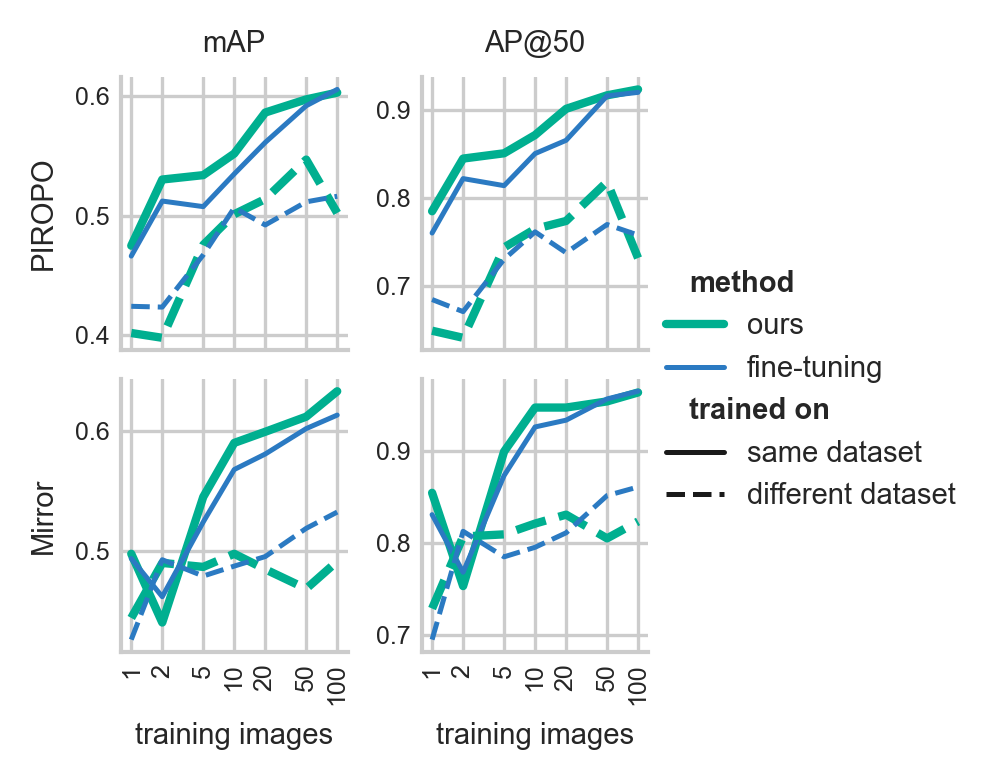

In [162]:
from matplotlib import rcParams

sb.set_context('paper')
sb.set_style('whitegrid')
sb.set_palette(kit4cyan())
fontsize = 7
rcParams['xtick.major.pad']=-2
rcParams['ytick.major.pad']=-2

# set up figure
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(3.123, 2.4))
fig.set_dpi(300)

# draw line plots individually
metrics = ['mAP', 'AP@50']
hue_order = ['ADV + SPA', 'fine-tuning', 'ADV + SPA MW', 'fine-tuning MW', ]
hue_order_mw = ['ADV + SPA', 'fine-tuning', 'ADV + SPA PIROPO', 'fine-tuning PIROPO', ]
for i, metric in enumerate(metrics):
    sb.lineplot(data=df[(df['setting'].isin(['fine-tuning', 'ADV + SPA', 'fine-tuning MW', 'ADV + SPA MW']))
                        & (df['size'] <= 100) & (df['metric'] == metric)],
                ax=axes[0, i],
                x='size',
                y='value',
                hue='setting',
                hue_order=hue_order,
                err_style=None)
    sb.lineplot(
        data=df_mw[(df_mw['setting'].isin(['fine-tuning', 'ADV + SPA', 'fine-tuning PIROPO', 'ADV + SPA PIROPO']))
                   & (df_mw['size'] <= 100) & (df_mw['metric'] == metric)],
        ax=axes[1, i],
        x='size',
        y='value',
        hue='setting',
        hue_order=hue_order_mw,
        err_style=None)
    axes[0, i].set_title(metric, fontsize=fontsize)
    axes[1, i].set_xlabel('training images', fontsize=fontsize)

# legends
for r in range(2):
    for c in range(2):
        axes[r, c].set_ylabel('')  # remove y label
        plt.setp(axes[r, c].get_yticklabels(), fontsize=fontsize-1)
        axes[r, c].legend([], [], frameon=False)  # remove old legend
        # recolor and restyle lines
        axes[r, c].lines[0].set_linewidth(2)
        axes[r, c].lines[1].set_c('#2B7AC2')
        axes[r, c].lines[2].set_c('#00AF90')
        axes[r, c].lines[2].set_linewidth(2)
        axes[r, c].lines[2].set_linestyle('--')
        axes[r, c].lines[3].set_c('#2B7AC2')
        axes[r, c].lines[3].set_linestyle('--')
# empty handles and category handles for legend
ph = [plt.plot([], marker='', ls='')[0]]
h1 = [plt.plot([], marker='', ls='solid', color='k')[0]]
h2 = [plt.plot([], marker='', ls='--', color='k')[0]]
handles = ph + axes[0, 0].lines[:2] + ph + h1 + h2
labels = ['method', 'ours', 'fine-tuning', 'trained on', 'same dataset', 'different dataset']
leg = fig.legend(handles=handles, labels=labels, loc=7, frameon=False, fontsize=fontsize)
# set legend columnd headers bold
vpack = leg._legend_handle_box.get_children()[0]
hpack_idx = [0, 3]
for i in hpack_idx:
    hpack = vpack.get_children()[i]
    hpack.get_children()[0].set_width(0) # modify spacing before text
    hpack.get_children()[1].get_children()[0].set_fontweight('bold')

# labels
axes[0, 0].set_ylabel('PIROPO', fontsize=fontsize)
axes[1, 0].set_ylabel('Mirror', fontsize=fontsize)
plt.xscale('log')
sizes = [1, 2, 5, 10, 20, 50, 100]
plt.xticks(ticks=sizes)
for i in range(2):
    axes[1, i].set_xticklabels(labels=sizes, rotation=90, size=fontsize - 1)
sb.despine()
plt.tight_layout(pad=0, w_pad=0.7, h_pad=0.7, rect=[0, 0, 0.66, 1])

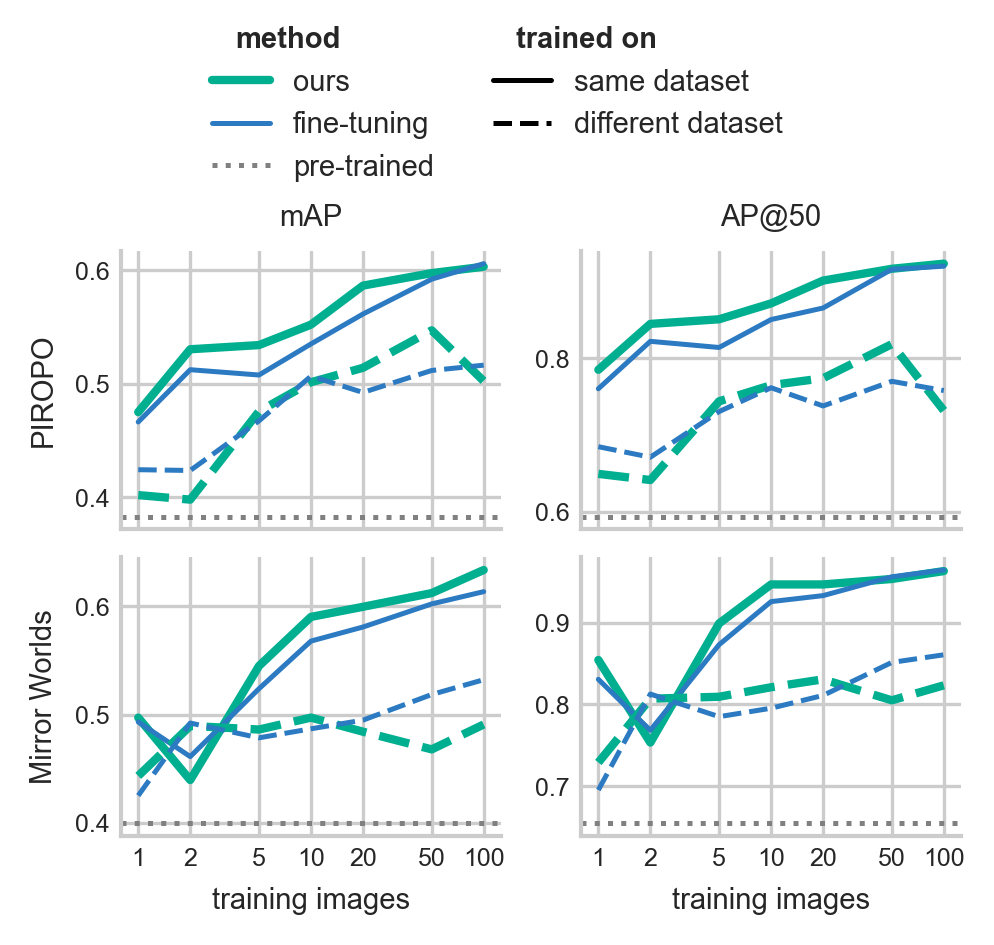

In [40]:
from matplotlib import rcParams

sb.set_context('paper')
sb.set_style('whitegrid')
sb.set_palette(kit4cyan())
fontsize = 7
rcParams['xtick.major.pad']=-2
rcParams['ytick.major.pad']=-2

# set up figure
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(3.123, 3))
fig.set_dpi(300)

# draw line plots individually
metrics = ['mAP', 'AP@50']
hue_order = ['ADV + SPA', 'fine-tuning', 'ADV + SPA MW', 'fine-tuning MW', ]
hue_order_mw = ['ADV + SPA', 'fine-tuning', 'ADV + SPA PIROPO', 'fine-tuning PIROPO', ]
for i, metric in enumerate(metrics):
    sb.lineplot(data=df[(df['setting'].isin(['fine-tuning', 'ADV + SPA', 'fine-tuning MW', 'ADV + SPA MW']))
                        & (df['size'] <= 100) & (df['metric'] == metric)],
                ax=axes[0, i],
                x='size',
                y='value',
                hue='setting',
                hue_order=hue_order,
                err_style=None)
    sb.lineplot(
        data=df_mw[(df_mw['setting'].isin(['fine-tuning', 'ADV + SPA', 'fine-tuning PIROPO', 'ADV + SPA PIROPO']))
                   & (df_mw['size'] <= 100) & (df_mw['metric'] == metric)],
        ax=axes[1, i],
        x='size',
        y='value',
        hue='setting',
        hue_order=hue_order_mw,
        err_style=None)
    axes[0, i].set_title(metric, fontsize=fontsize)
    axes[1, i].set_xlabel('training images', fontsize=fontsize)
    # baseline reference line
    axes[0, i].axhline(list(baseline.values())[2*i], ls=':', c='.5')
    axes[1, i].axhline(list(baseline_mw.values())[2*i], ls=':', c='.5')

# legends
for r in range(2):
    for c in range(2):
        axes[r, c].set_ylabel('')  # remove y label
        plt.setp(axes[r, c].get_yticklabels(), fontsize=fontsize-1)
        axes[r, c].legend([], [], frameon=False)  # remove old legend
        # recolor and restyle lines
        axes[r, c].lines[0].set_linewidth(2)
        axes[r, c].lines[1].set_c('#2B7AC2')
        axes[r, c].lines[2].set_c('#00AF90')
        axes[r, c].lines[2].set_linewidth(2)
        axes[r, c].lines[2].set_linestyle('--')
        axes[r, c].lines[3].set_c('#2B7AC2')
        axes[r, c].lines[3].set_linestyle('--')
# empty handles and category handles for legend
ph = [plt.plot([], marker='', ls='')[0]]
h1 = [plt.plot([], marker='', ls='solid', color='k')[0]]
h2 = [plt.plot([], marker='', ls='--', color='k')[0]]
handles = ph + axes[0, 0].lines[:2] + axes[0, 0].lines[8:9] + ph + h1 + h2
labels = ['method', 'ours', 'fine-tuning', 'pre-trained', 'trained on', 'same dataset', 'different dataset']
leg = fig.legend(handles=handles, labels=labels, loc=9, ncol=2, frameon=False, fontsize=fontsize)
# set legend columnd headers bold
for vpack in leg._legend_handle_box.get_children():
    hpack = vpack.get_children()[0]
    hpack.get_children()[0].set_width(0) # modify spacing before text
    hpack.get_children()[1].get_children()[0].set_fontweight('bold')

# labels
axes[0, 0].set_ylabel('PIROPO', fontsize=fontsize)
axes[1, 0].set_ylabel('Mirror Worlds', fontsize=fontsize)
plt.xscale('log')
sizes = [1, 2, 5, 10, 20, 50, 100]
plt.xticks(ticks=sizes)
for i in range(2):
    axes[1, i].set_xticklabels(labels=sizes, size=fontsize - 1)
sb.despine()
plt.tight_layout(pad=0, w_pad=0.7, h_pad=0.7, rect=[0, 0, 1, 0.79])

[{'bbox_mAP_50': (4.0, 0.842)},
 {'bbox_mAP_50': (6.0, 0.861)},
 {'bbox_mAP_50': (30.0, 0.895)}]

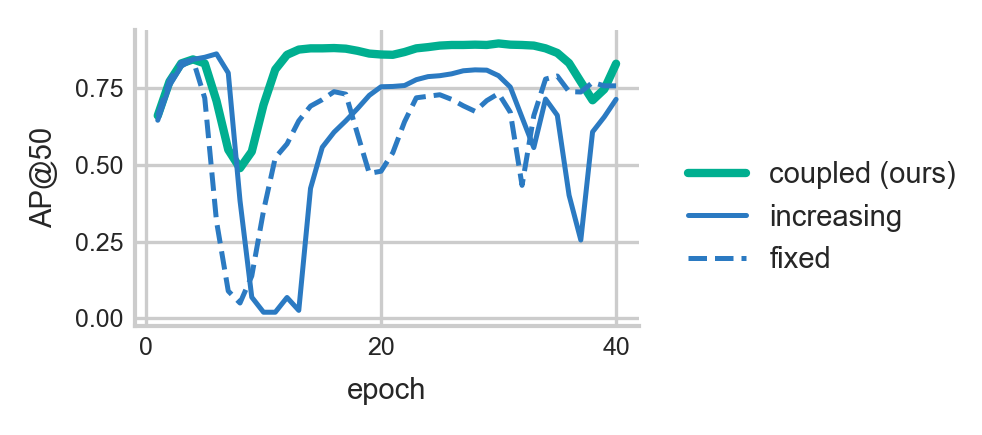

In [194]:
from matplotlib import rcParams

sb.set_context('paper')
sb.set_style('whitegrid')
sb.set_palette(kit4cyan())
fontsize = 7
rcParams['xtick.major.pad']=-2
rcParams['ytick.major.pad']=-2

logs = [
    [
        'GPA/tuning/coco_piropo_20a_TwoStageDetectorAdaptiveAdversarial_1_1_1_1_none_gTrue_seed_direct6.log',
        'fixed'
    ],  # adversarial, λ 1:1, pretrained
    [
        'GPA/tuning/coco_piropo_20a_TwoStageDetectorAdaptiveAdversarial_1_1_1_1_none_gTrue_seed_direct5.log',
        'increasing'
    ],  # adversarial, λ 1:1 increasing, pretrained
    ['GPA/tuning/coco_piropo_20a_TwoStageDetectorAdaptiveAdversarial_1_1_1_1_none_gTrue_seed_direct7.log',
     'coupled (ours)'],  # adversarial, λ 1:1 coupled, pretrained
]

df, maxs = df_from_log(['setting'], ['bbox_mAP_50'], logs, get_max=True)

hue_order = ['coupled (ours)', 'increasing', 'fixed']
g = sb.relplot(data=df[df['occurrence'] <= 40],
               x='occurrence',
               y='value',
               kind='line',
               hue='setting',
               hue_order=hue_order,
               col='metric',
               facet_kws={
                   'sharey': False,
                   'sharex': True,
                   'legend_out': False
               },
               height=10,
               aspect=1,
               col_wrap=1)

# set figure size to textwidth in latex and make space for legend
g.fig.set_size_inches(3.123, 1.25)
g.fig.set_dpi(300)
axes = g.axes.flatten()
# adjust linstyles
axes[0].lines[0].set_linewidth(2)
axes[0].lines[2].set_c('#2B7AC2')
axes[0].lines[2].set_linestyle('--')
# legend
axes[0].legend([], [], frameon=False)  # remove old legend
l = ['coupled (ours)', 'increasing', 'fixed']
h = axes[0].lines[:3]
leg = g.fig.legend(h, l, frameon=False, loc=7, fontsize=fontsize)

g.set_axis_labels('epoch', 'AP@50', fontsize=fontsize)
g.set_titles(col_template='', row_template='')
plt.xticks(size=fontsize-1)
plt.yticks(size=fontsize-1)
plt.tight_layout(pad=0, w_pad=0.7, h_pad=0.7, rect=[0, 0, .65, 1])
maxs